In [3]:
import tensorflow as tf
#plot tools
import seaborn as sns
import matplotlib.pyplot as plt
#simple tools
import numpy as np
import pandas as pd

In [5]:
train_65 = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text-dataset/Training_Essay_Data.csv')
prompts = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv')
original = pd.read_csv("/kaggle/input/llm-detect-ai-generated-text/train_essays.csv")
train_v2 = pd.read_csv('/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv')
train_lim = pd.read_csv('/kaggle/input/llm-generated-essays/ai_generated_train_essays.csv')
train_lim2 = pd.read_csv('/kaggle/input/llm-generated-essays/ai_generated_train_essays_gpt-4.csv')

In [6]:
original.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


In [7]:
#Combining the datasets: 
combined_from_comp = pd.merge(original,prompts, on='prompt_id', how='left')

In [8]:
# Define the new column order
new_column_order = ['id', 'prompt_id' , 'prompt_name', 'instructions', 'source_text', 'text', 'generated']

# Reorder the columns
combined_from_comp = combined_from_comp[new_column_order]

In [9]:
train_lim = pd.concat([train_lim, train_lim2], ignore_index=True)

In [10]:
print("Training labels distribution:", np.bincount(train_lim['generated']))

Training labels distribution: [  0 700]


In [11]:
print("Training labels distribution:", np.bincount(combined_from_comp['generated']))

Training labels distribution: [1375    3]


In [12]:
combined_from_comp.head()

,id,prompt_id,prompt_name,instructions,source_text,text,generated
0,0059830c,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...",Cars. Cars have been around since they became ...,0
1,005db917,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...",Transportation is a large necessity in most co...,0
2,008f63e3,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...","""America's love affair with it's vehicles seem...",0
3,00940276,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...",How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...",Cars are a wonderful thing. They are perhaps o...,0


In [13]:
train_lim.head()

,id,prompt_id,text,generated
0,d429f032,0,Advantages of Limiting Car Usage \n\nLimiting ...,1
1,1ce279be,0,Advantages of Limiting Car Usage\n\nLimiting c...,1
2,c9595213,0,Limiting car usage has numerous advantages tha...,1
3,f2266d87,0,The passages provided discuss the advantages o...,1
4,eeace4bd,0,Title: The Advantages of Limiting Car Usage\n\...,1


In [14]:
# Define the mapping dictionary
prompt_mapping = {
    0: 'car-free-cities',
    1: 'Does the electoral college work?'
}
instructions = {
    0 : 'Write an explanatory essay to inform fellow citizens about the advantages of limiting car usage. Your essay must be based on ideas and information that can be found in the passage set. Manage your time carefully so that you can read the passages; plan your response; write your response; and revise and edit your response. Be sure to use evidence from multiple sources; and avoid overly relying on one source. Your response should be in the form of a multiparagraph essay. Write your essay in the space provided.',
    1 : 'Write a letter to your state senator in which you argue in favor of keeping the Electoral College or changing to election by popular vote for the president of the United States. Use the information from the texts in your essay. Manage your time carefully so that you can read the passages; plan your response; write your response; and revise and edit your response. Be sure to include a claim; address counterclaims; use evidence from multiple sources; and avoid overly relying on one source. Your response should be in the form of a multiparagraph essay. Write your response in the space provided.'    
}
source_text = {
    0 : str(combined_from_comp['instructions'].unique()[0]),
    1 : str(combined_from_comp['instructions'].unique()[1])
}

# Apply the mapping to create the new column
train_lim['prompt_name'] = train_lim['prompt_id'].map(prompt_mapping)
train_lim['source_text'] = train_lim['prompt_id'].map(source_text)
train_lim['instructions'] = train_lim['prompt_id'].map(instructions)

In [15]:
train_lim = train_lim[new_column_order]

In [16]:
train_lim.head()

,id,prompt_id,prompt_name,instructions,source_text,text,generated
0,d429f032,0,car-free-cities,Write an explanatory essay to inform fellow ci...,Write an explanatory essay to inform fellow ci...,Advantages of Limiting Car Usage \n\nLimiting ...,1
1,1ce279be,0,car-free-cities,Write an explanatory essay to inform fellow ci...,Write an explanatory essay to inform fellow ci...,Advantages of Limiting Car Usage\n\nLimiting c...,1
2,c9595213,0,car-free-cities,Write an explanatory essay to inform fellow ci...,Write an explanatory essay to inform fellow ci...,Limiting car usage has numerous advantages tha...,1
3,f2266d87,0,car-free-cities,Write an explanatory essay to inform fellow ci...,Write an explanatory essay to inform fellow ci...,The passages provided discuss the advantages o...,1
4,eeace4bd,0,car-free-cities,Write an explanatory essay to inform fellow ci...,Write an explanatory essay to inform fellow ci...,Title: The Advantages of Limiting Car Usage\n\...,1


In [17]:
train_merged = pd.concat([combined_from_comp,train_lim],ignore_index = True)

In [18]:
train_merged.head()

,id,prompt_id,prompt_name,instructions,source_text,text,generated
0,0059830c,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...",Cars. Cars have been around since they became ...,0
1,005db917,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...",Transportation is a large necessity in most co...,0
2,008f63e3,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...","""America's love affair with it's vehicles seem...",0
3,00940276,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...",How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ...",Cars are a wonderful thing. They are perhaps o...,0


In [19]:
train_merged.shape

(2078, 7)

In [20]:
print("Training labels distribution:", np.bincount(train_merged['generated']))

Training labels distribution: [1375  703]


In [21]:
train_merged = train_merged[['text' , 'generated']]

In [22]:
train_v2 = train_v2[['text' , 'label']]
train_v2.rename(columns = {'label' : 'generated'} , inplace = True)

In [23]:
train_merged2 = pd.concat([train_v2,train_65] , ignore_index = True)

In [24]:
train_merged2.head()

,text,generated
0,Phones\n\nModern humans today are always on th...,0
1,This essay will explain if drivers should or s...,0
2,Driving while the use of cellular devices\n\nT...,0
3,Phones & Driving\n\nDrivers should not be able...,0
4,Cell Phone Operation While Driving\n\nThe abil...,0


In [25]:
train_merged = pd.concat([train_merged , train_merged2] , ignore_index = True)

In [26]:
print(np.bincount(train_merged['generated']))

[46254 29837]


In [27]:
# Shuffle the DataFrame
train_merged = train_merged.sample(frac=1, random_state=42).reset_index(drop=True)
train_merged = train_merged.head(10000)

In [28]:
print("Training labels distribution:", np.bincount(train_merged['generated']))

Training labels distribution: [6098 3902]


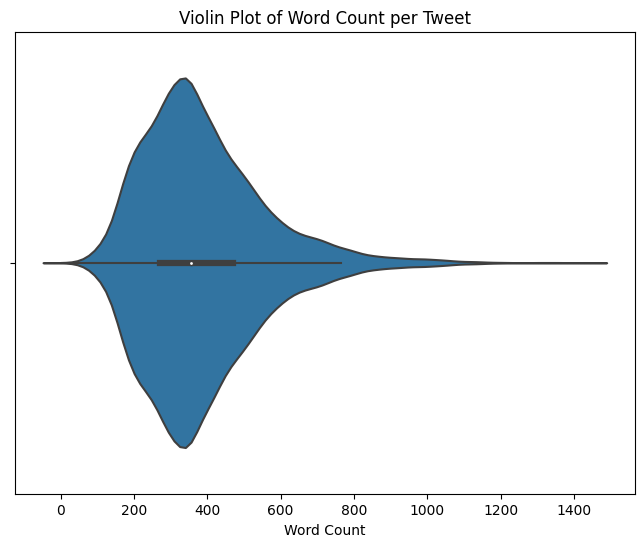

In [29]:
train_merged['word_count'] = train_merged['text'].apply(lambda x: len(str(x).split()))

# Calculate the statistics
plt.figure(figsize=(8, 6))
sns.violinplot(x=train_merged['word_count'])
plt.title('Violin Plot of Word Count per Tweet')
plt.xlabel('Word Count')
plt.show()

In [30]:
train_merged.head()

,text,generated,word_count
0,The Importance of the Electoral College in Pre...,1,646
1,The author did not do a good job supporting th...,0,538
2,The advantages of limiting car usage is incred...,0,476
3,Luke wants to convince you to become a seagoin...,0,293
4,"The author of ""The Challenge of Exploring Venu...",0,213


# What would be the steps here? 
- tokenizing words and sentences in the dataset 
- fine tuning the transformer model big bird. 

In [ ]:
from sklearn.model_selection import train_test_split

# First, split into train+val and test
train_val_df, test_df = train_test_split(train_merged, test_size=0.1, random_state=42, stratify=train_merged['generated'])

# Now, split the train+val into train and validation
train_df, val_df = train_test_split(train_val_df, test_size=0.1111, random_state=42, stratify=train_val_df['generated'])

# Print the sizes of the splits to verify
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")


In [ ]:
from transformers import BertTokenizer

# Initialize tokenizer and model (PyTorch)
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [ ]:
train_encodings = tokenizer(train_df['text'].tolist(), truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(val_df['text'].tolist(), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_df['text'].tolist(), truncation=True, padding=True, max_length=512)

In [ ]:
# Convert encodings and labels into TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_df['generated'].tolist()))
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_df['generated'].tolist()))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_df['generated'].tolist()))

# Batch the datasets
train_dataset = train_dataset.shuffle(len(train_dataset)).batch(8)
val_dataset = val_dataset.batch(8)
test_dataset = test_dataset.batch(8)


In [ ]:
from transformers import TFBertForSequenceClassification

# Load the BERT model for sequence classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-cased', num_labels=2)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [ ]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=3)

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


In [ ]:
# Make predictions on the test set
y_pred = model.predict(test_dataset)

# Since the model outputs logits, convert these to predicted class labels
y_pred_labels = tf.argmax(y_pred.logits, axis=1)


In [ ]:
# Extract true labels from the test set
y_true = []
for _, labels in test_dataset:
    y_true.extend(labels.numpy())

# Convert to a TensorFlow tensor for compatibility
y_true = tf.convert_to_tensor(y_true)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.config.id2label.values())
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
model.save_pretrained('./AI-detector')
tokenizer.save_pretrained('./AI-detector-tokenizer')

In [ ]:
test_essay = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/test_essays.csv')

In [ ]:
test_essay.head()

In [ ]:
test_encodings = tokenizer(test_essay['text'].tolist(), truncation=True, padding=True, max_length=512)

In [ ]:
# Create the TensorFlow dataset only for these 3 entries
test_dataset = tf.data.Dataset.from_tensor_slices(dict(test_encodings)).batch(8)


# Make predictions using the model
predictions = model.predict(test_dataset)

# Convert logits to probabilities using softmax
prediction_probabilities = tf.nn.softmax(predictions.logits, axis=-1).numpy()

# Extract the probability of the positive class
positive_class_probs = prediction_probabilities[:, 1]

In [ ]:
print(f"Length of test_essay['id']: {len(test_essay['id'])}")
print(f"Length of positive_class_probs: {len(positive_class_probs)}")


In [ ]:
results_df = pd.DataFrame({
    'id': test_essay['id'],
    'generated': positive_class_probs
})

# Save the results to a CSV file
results_df.to_csv('submission.csv', index=False)


In [ ]:
print(results_df)